In [1]:
# import numerical libraries
import numpy as np
import pandas as pd
import warnings

# import graphical plot libraries
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Import Linear regression machine learning libraries
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [2]:
warnings.filterwarnings('ignore')
# read / load data from csv.
data = pd.read_csv('/Users/palammysurareddy/Downloads/car-mpg - car-mpg.csv')
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
data = data.drop(['car_name'], axis = 1)
data['origin'] = data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
data = pd.get_dummies(data,columns = ['origin'])
data = data.replace('?', np.nan)
# Identify columns that should be numeric but might contain NaNs or be object type.
# It's good practice to list your numeric columns or infer them.
# For example, if 'horsepower' and 'acceleration' were originally numbers but had
numeric_cols = ['cyl', 'disp', 'hp', 'wt', 'acc', 'yr']
for col in numeric_cols:
    # pd.to_numeric will convert to a number, coercing errors to NaN
    # errors='coerce' is crucial here: it turns any value that *cannot* be converted
    # into a number into NaN. This handles cases where '?' might not have been replaced,
    # or other non-numeric strings exist.
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.apply(lambda x: x.fillna(x.median()), axis = 0)

In [6]:
X = data.drop(['mpg'], axis=1) # independent variable
Y = data[['mpg']] #depentdent variable

In [7]:
X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s, columns = X.columns) #converting scaled data into dataframe

Y_s = preprocessing.scale(Y)
Y_s = pd.DataFrame(Y_s, columns = Y.columns)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_s, Y_s, test_size=0.30,random_state=1)
X_train.shape

(278, 10)

In [9]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))

The coefficient for cyl is 0.3210223856916098
The coefficient for disp is 0.32483430918483935
The coefficient for hp is -0.22916950059437635
The coefficient for wt is -0.7112101905072296
The coefficient for acc is 0.014713682764190952
The coefficient for yr is 0.37558119495107395
The coefficient for car_type is 0.3814769484233098
The coefficient for origin_america is -0.07472247547584174
The coefficient for origin_asia is 0.04451525203567835
The coefficient for origin_europe is 0.04834854953945395
The intercept is 0.0192841161036397


In [10]:
ridge_model = Ridge(alpha =0.3)
ridge_model.fit(X_train, Y_train)

print('Ridge coef.{}'.format(ridge_model.coef_)) 

Ridge coef.[[ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
   0.37725608 -0.07423624  0.04441039  0.04784031]]


In [11]:
lasso_model = Lasso(alpha =0.1)
lasso_model.fit(X_train, Y_train)

print('Lasso coef.{}'.format(lasso_model.coef_))

Lasso coef.[-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


In [12]:
print(regression_model.score(X_train, Y_train))
print(regression_model.score(X_test, Y_test))

print('*************************')
#Ridge
print(ridge_model.score(X_train, Y_train))
print(ridge_model.score(X_test, Y_test))

print('*************************')
#Lasso
print(lasso_model.score(X_train, Y_train))
print(lasso_model.score(X_test, Y_test))

0.8343770256960538
0.8513421387780067
*************************
0.8343617931312616
0.8518882171608506
*************************
0.7938010766228453
0.8375229615977083


In [13]:
data_train_test = pd.concat([X_train, Y_train], axis =1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035


In [14]:
import statsmodels.formula.api as smf
ols1 = smf.ols(formula = 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data = data_train_test).fit()
ols1.params

Intercept         0.019284
cyl               0.321022
disp              0.324834
hp               -0.229170
wt               -0.711210
acc               0.014714
yr                0.375581
car_type          0.381477
origin_america   -0.074722
origin_europe     0.048349
origin_asia       0.044515
dtype: float64

In [15]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           3.12e-99
Time:                        10:51:20   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

In [16]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regression_model.predict(X_test)-Y_test)**2)

# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 0.37766934254087825


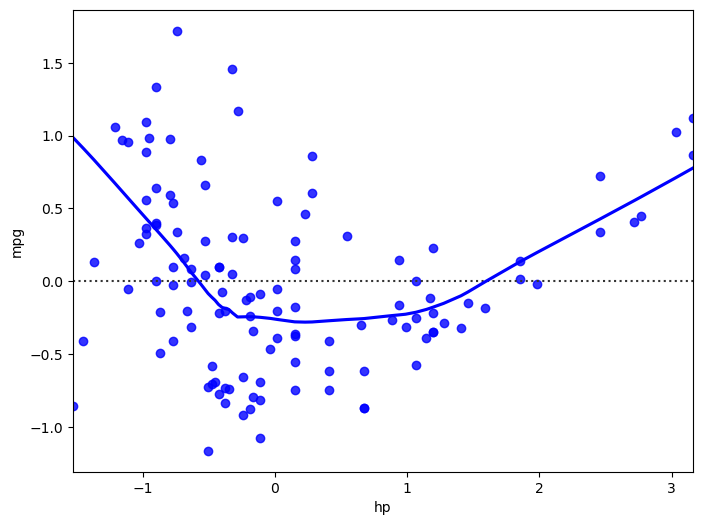

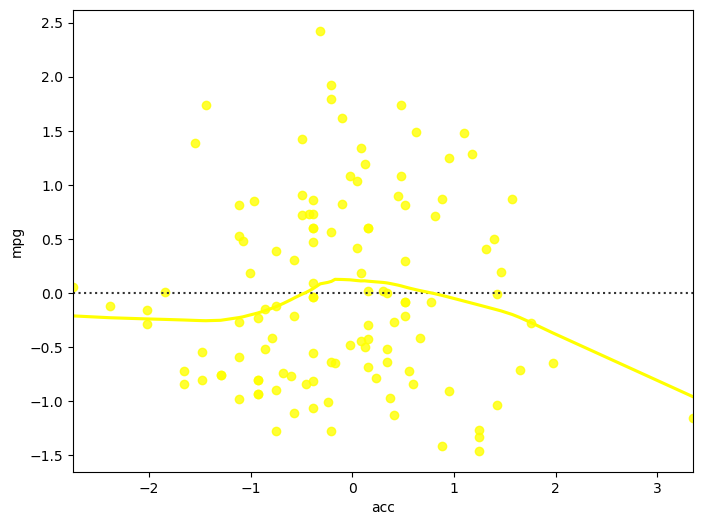

In [20]:
fig = plt.figure(figsize=(8,6))
sn.residplot(x= X_test['hp'], y= Y_test['mpg'], color='blue', lowess=True )


fig = plt.figure(figsize=(8,6))
sn.residplot(x= X_test['acc'], y= Y_test['mpg'], color='yellow', lowess=True )
plt.show()

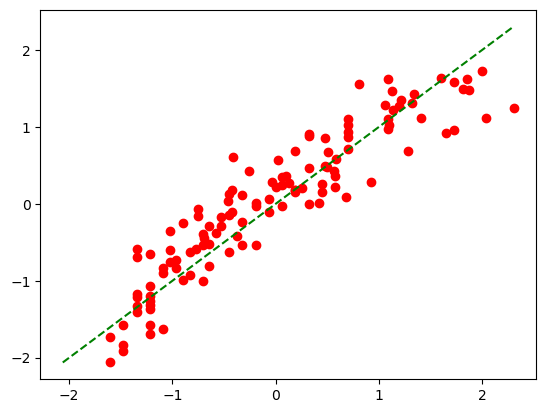

In [19]:
y_pred = regression_model.predict(X_test)

min_value = min(Y_test['mpg'].min(), y_pred.min())
max_value = max(Y_test['mpg'].max(), y_pred.max())

plot_range = np.linspace(min_value,max_value, 100)

plt.plot(plot_range, plot_range, color='green', linestyle='--', label='Perfect Prediction (y=x)')
plt.scatter(Y_test['mpg'], y_pred, color='red')
plt.show()